# Importação de Bibliotecas

In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [169]:
df = pd.read_excel('/content/dataset.xlsx')

In [170]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df.shape

(5644, 111)

In [172]:
# variável 'SARS-Cov-2 exam result':
# cria a variavel 'Target', onde negative = 0 e positive = 1
target = []
for i in range(df.shape[0]):
    if df['SARS-Cov-2 exam result'][i]=='negative':
        target.append(0)
    else:
        target.append(1)

dfTarget  =pd.DataFrame({'Target': target})

#juntar o df com o dfTarget
df = pd.concat([df, dfTarget], sort=False, axis=1)
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Target
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# **1. Criação da Target**

1. **Criação da Variável 'Target':**
   - O código cria uma nova lista chamada `target`.
   - Percorre cada linha do DataFrame `df` para verificar o valor da coluna `'SARS-Cov-2 exam result'`.
   - Se o valor nessa coluna for **negative**:
    - o código adiciona `0` à lista `target`.
   - Se o valor for **positive**:
    - o código adiciona `1` à lista.

2. **Conversão da Lista 'Target' em DataFrame:**
   - Depois que o loop termina, o código converte a lista `target` em um DataFrame chamado `dfTarget`, com uma coluna chamada `'Target'`.

3. **Concatenação dos DataFrames:**
   - O código então concatena o DataFrame original `df` com o novo DataFrame `dfTarget`.


4. **Resultado Final:**
   - O DataFrame `df` agora contém todas as colunas originais, mais a nova coluna `'Target'`, onde cada linha tem um valor de `0` (para resultado negativo) ou `1` (para resultado positivo).

In [173]:
variaveis = list(df.columns)
variaveis

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

In [174]:
# lista (varExcluir) a partir da lista variaveis

varExcluir = ['Patient ID',
 #'Patient age quantile',
 #'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 #'Hematocrit',
 #'Hemoglobin',
 #'Platelets',
 #'Mean platelet volume ',
 #'Red blood Cells',
 #'Lymphocytes',
 #'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 #'Leukocytes',
 #'Basophils',
 #'Mean corpuscular hemoglobin (MCH)',
 #'Eosinophils',
 #'Mean corpuscular volume (MCV)',
 #'Monocytes',
 #'Red blood cell distribution width (RDW)',
 #'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 #'Neutrophils',
 #'Urea',
 'Proteina C reativa mg/dL',
 #'Creatinine',
 #'Potassium',
 #'Sodium',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 #'Alanine transaminase',
 #'Aspartate transaminase',
 #'Gamma-glutamyltransferase\xa0',
 #'Total Bilirubin',
 #'Direct Bilirubin',
 #'Indirect Bilirubin',
 #'Alkaline phosphatase',
 'Ionized calcium\xa0',
 'Strepto A',
 'Magnesium',
 'pCO2 (venous blood gas analysis)',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Fio2 (venous blood gas analysis)',
 'Total CO2 (venous blood gas analysis)',
 'pH (venous blood gas analysis)',
 'HCO3 (venous blood gas analysis)',
 'Rods #',
 'Segmented',
 'Promyelocytes',
 'Metamyelocytes',
 'Myelocytes',
 'Myeloblasts',
 'Urine - Esterase',
 'Urine - Aspect',
 'Urine - pH',
 'Urine - Hemoglobin',
 'Urine - Bile pigments',
 'Urine - Ketone Bodies',
 'Urine - Nitrite',
 'Urine - Density',
 'Urine - Urobilinogen',
 'Urine - Protein',
 'Urine - Sugar',
 'Urine - Leukocytes',
 'Urine - Crystals',
 'Urine - Red blood cells',
 'Urine - Hyaline cylinders',
 'Urine - Granular cylinders',
 'Urine - Yeasts',
 'Urine - Color',
 'Partial thromboplastin time\xa0(PTT)\xa0',
 'Relationship (Patient/Normal)',
 'International normalized ratio (INR)',
 'Lactic Dehydrogenase',
 'Prothrombin time (PT), Activity',
 'Vitamin B12',
 'Creatine phosphokinase\xa0(CPK)\xa0',
 'Ferritin',
 'Arterial Lactic Acid',
 'Lipase dosage',
 'D-Dimer',
 'Albumin',
 'Hb saturation (arterial blood gases)',
 'pCO2 (arterial blood gas analysis)',
 'Base excess (arterial blood gas analysis)',
 'pH (arterial blood gas analysis)',
 'Total CO2 (arterial blood gas analysis)',
 'HCO3 (arterial blood gas analysis)',
 'pO2 (arterial blood gas analysis)',
 'Arteiral Fio2',
 'Phosphor',
 'ctO2 (arterial blood gas analysis)']

Obs: As linhas comentadas, são das variáveis que devem permanecer

In [175]:
# excluindo as variaveis
df.drop(varExcluir, axis=1, inplace=True)

In [176]:
df.isnull().sum()

,0
Patient age quantile,0
SARS-Cov-2 exam result,0
Hematocrit,5041
Hemoglobin,5041
Platelets,5042
Mean platelet volume,5045
Red blood Cells,5042
Lymphocytes,5042
Mean corpuscular hemoglobin concentration (MCHC),5042
Leukocytes,5042


In [177]:
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Target
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5640,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5641,4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5642,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Obs: antes o dataset possuia 111 colunas, agora para o modelo serão 30

In [178]:
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Target
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5640,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5641,4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5642,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [179]:
df.isnull().sum()

,0
Patient age quantile,0
SARS-Cov-2 exam result,0
Hematocrit,5041
Hemoglobin,5041
Platelets,5042
Mean platelet volume,5045
Red blood Cells,5042
Lymphocytes,5042
Mean corpuscular hemoglobin concentration (MCHC),5042
Leukocytes,5042


In [180]:
import plotly.express as px
import pandas as pd

# Contar o número de ocorrências de cada resultado do exame
result_counts = df['SARS-Cov-2 exam result'].value_counts().reset_index()
result_counts.columns = ['Resultado', 'Contagem']

fig = px.bar(result_counts, x='Resultado', y='Contagem',
             title='Contagem de pacientes que testaram para COVID-19',
             labels={'Resultado': 'Contagem de testes Negativos (0) e Positivos (1)', 'Contagem': 'Contagem'},
             text='Contagem')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

<Axes: >

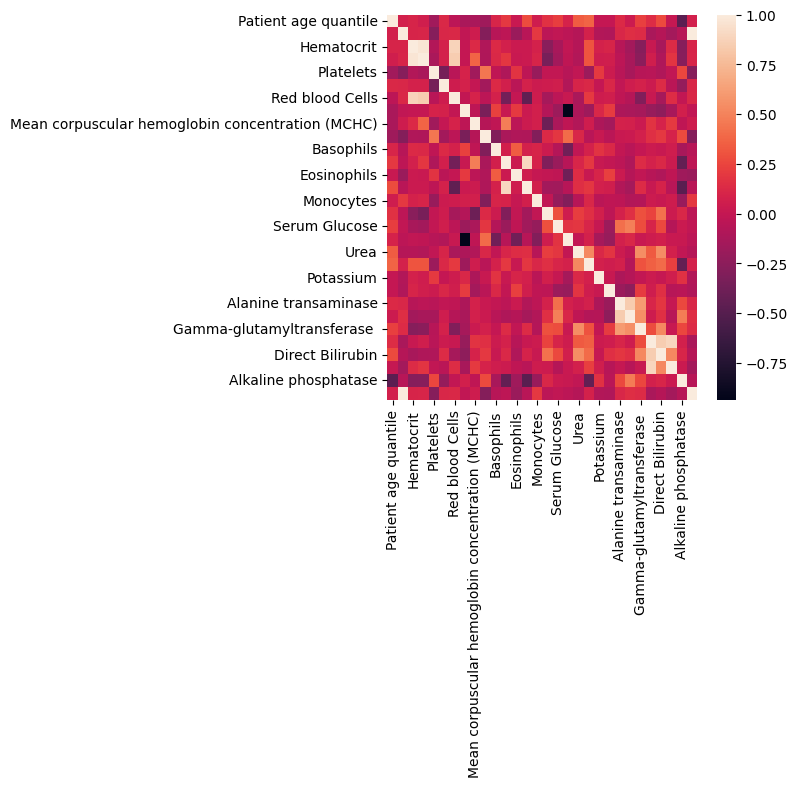

In [181]:
# converter colunas categóricas em numéricas
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map({'negative': 0, 'positive': 1})

# calcular a correlação
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())

In [182]:
# separando as variáveis independentes da variável dependente
X = df.drop(['SARS-Cov-2 exam result', 'Target'], axis=1)
Y = df['Target']

In [183]:
# separando os dados entre dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)

In [184]:
# instanciando a rede neural
model = tf.keras.models.Sequential()

In [185]:
X.shape[1]

28

In [186]:
# camada de entrada

neuroniosEnt =X.shape[1]

#camada oculta 1
#28-17-
model.add(tf.keras.layers.Dense(units=17,kernel_initializer='uniform',activation='relu', input_dim=neuroniosEnt))

#camada oculta 2
#28-17-17
model.add(tf.keras.layers.Dense(units=17,kernel_initializer='uniform',activation='relu'))

#camada oculta 3
#28-17-17-15
model.add(tf.keras.layers.Dense(units=15,kernel_initializer='uniform',activation='relu'))

#camada oculta 4
#28-17-17-15-15
model.add(tf.keras.layers.Dense(units=15,kernel_initializer='uniform',activation='relu'))

#camada oculta 5
#28-17-17-15-15-8
#model.add(tf.keras.layers.Dense(units=8,kernel_initializer='uniform',activation='relu'))

#camada oculta 6
#28-17-17-15-15-8-8
#model.add(tf.keras.layers.Dense(units=8,kernel_initializer='uniform',activation='relu'))


#camada de saida
#28-17-17-15-15-8-8-1
model.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [187]:
# desenho da rede
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 17)                  │             493 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 15)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,325 (5.18 KB)

 Trainable params: 1,325 (5.18 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [189]:
batch = 32
epocas = 50

model.fit(X_train,Y_train, batch_size=batch, epochs=epocas)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8994 - loss: nan
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8962 - loss: nan
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: nan
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9026 - loss: nan
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9008 - loss: nan
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9042 - loss: nan
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: nan
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8971 - loss: nan
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8902 - loss: nan
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8988 - loss: nan
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: nan
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9041 - loss: nan
E

In [190]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Testando a performance
y_pred_train = model.predict(X_train)
y_pred_train= (y_pred_train>0.5)
y_true_train = Y_train
print("Acurácia treino: {0}".format(accuracy_score(y_true_train, y_pred_train).round(2)))
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test>0.5)
y_true_test = Y_test
print("Acurácia teste : {0}".format(accuracy_score(y_true_test, y_pred_test).round(2)))

# Mas nos bastidores...
print('\n')
print('Relatório de Classificação')
print('\n')
print(classification_report(Y_test, y_pred_test))

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia treino: 0.9
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia teste : 0.9


Relatório de Classificação


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1528
           1       0.00      0.00      0.00       166

    accuracy                           0.90      1694
   macro avg       0.45      0.50      0.47      1694
weighted avg       0.81      0.90      0.86      1694



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



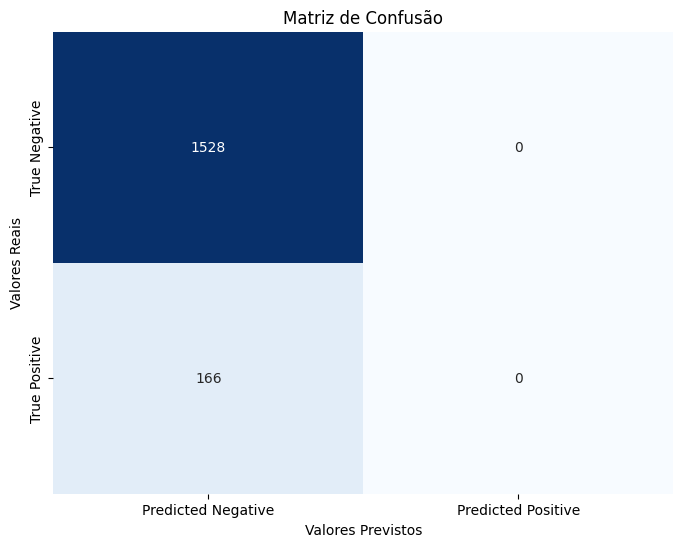

In [191]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, y_pred_test)

# Converter a matriz de confusão em um DataFrame para melhor visualização
cm_df = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Previstos')
plt.show()

In [192]:
corr = df.corr()['Target']
corr = abs(corr)
corr.reset_index()
corr = pd.DataFrame( corr.sort_values(ascending=True))
corr = corr[corr['Target']<0.1]

In [193]:
corr

,Target
Lymphocytes,0.015239
Serum Glucose,0.018834
Mean corpuscular hemoglobin (MCH),0.028480
Neutrophils,0.037977
Red blood cell distribution width (RDW),0.039855
Mean corpuscular hemoglobin concentration (MCHC),0.045820
Mean corpuscular volume (MCV),0.055232
Basophils,0.062994
Alkaline phosphatase,0.063171
Urea,0.069234


In [194]:
listaCorr = corr.index
listaCorr

Index(['Lymphocytes', 'Serum Glucose', 'Mean corpuscular hemoglobin (MCH)',
       'Neutrophils', 'Red blood cell distribution width (RDW)',
       'Mean corpuscular hemoglobin concentration (MCHC)',
       'Mean corpuscular volume (MCV)', 'Basophils', 'Alkaline phosphatase',
       'Urea', 'Direct Bilirubin', 'Patient age quantile', 'Creatinine',
       'Potassium', 'Sodium', 'Hematocrit'],
      dtype='object')

In [195]:
#criando um dataframe, excluindo as variáveis menos relevantes (<0.1)
nX = X.drop(listaCorr, axis=1)

In [196]:
# exibindo o dataframe
nX

,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Leukocytes,Eosinophils,Monocytes,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Indirect Bilirubin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.022340,-0.517413,0.010677,0.102004,-0.094610,1.482158,0.357547,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
nX.columns

Index(['Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Leukocytes', 'Eosinophils', 'Monocytes', 'Alanine transaminase',
       'Aspartate transaminase', 'Gamma-glutamyltransferase ',
       'Total Bilirubin', 'Indirect Bilirubin'],
      dtype='object')

In [198]:
nX.shape

(5644, 12)

In [199]:
# separando os dados entre dados de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(nX,Y, test_size=0.30, random_state=42)

In [200]:
# instanciando a rede neural
model = tf.keras.models.Sequential()

In [201]:
# exibindo o numedo de reunônios na camada de entrada
nX.shape[1]

12

In [202]:
# camada de entrada
neuroniosEnt =nX.shape[1]

In [203]:
#camada oculta 1
#17-17-
model.add(tf.keras.layers.Dense(units=17,kernel_initializer='uniform',activation='relu', input_dim=neuroniosEnt))

#camada oculta 2
#17-17-17
model.add(tf.keras.layers.Dense(units=17,kernel_initializer='uniform',activation='relu'))

#camada oculta 3
#17-17-17-15
model.add(tf.keras.layers.Dense(units=15,kernel_initializer='uniform',activation='relu'))

#camada oculta 4
#17-17-17-15-15
model.add(tf.keras.layers.Dense(units=15,kernel_initializer='uniform',activation='relu'))

#camada de saida
#17-17-17-15-15-1
model.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [204]:
#compilando a rede
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [205]:
#treinando o modelo
batch=32
epocas = 50

model.fit(X_train,Y_train, batch_size=batch, epochs=epocas)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8956 - loss: nan
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: nan
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8978 - loss: nan
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - loss: nan
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8993 - loss: nan
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: nan
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: nan
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9013 - loss: nan
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: nan
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: nan
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: nan
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8985 - loss: nan
E

In [206]:
# testando a performance
y_pred_train = model.predict(X_train)
y_pred_train= (y_pred_train>0.5)
y_true_train = Y_train
print("Acurácia treino: {0}".format(accuracy_score(y_true_train, y_pred_train).round(2)))
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test>0.5)
y_true_test = Y_test
print("Acurácia teste : {0}".format(accuracy_score(y_true_test, y_pred_test).round(2)))

print('\n')
print('Relatório de Classificação')
print('\n')
print(classification_report(Y_test, y_pred_test))

#Matriz de confusão
print('\n')
print('Matriz de Confusão ')
print( confusion_matrix(Y_test, y_pred_test))

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia treino: 0.9
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia teste : 0.91


Relatório de Classificação


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1536
           1       0.00      0.00      0.00       158

    accuracy                           0.91      1694
   macro avg       0.45      0.50      0.48      1694
weighted avg       0.82      0.91      0.86      1694



Matriz de Confusão 
[[1536    0]
 [ 158    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



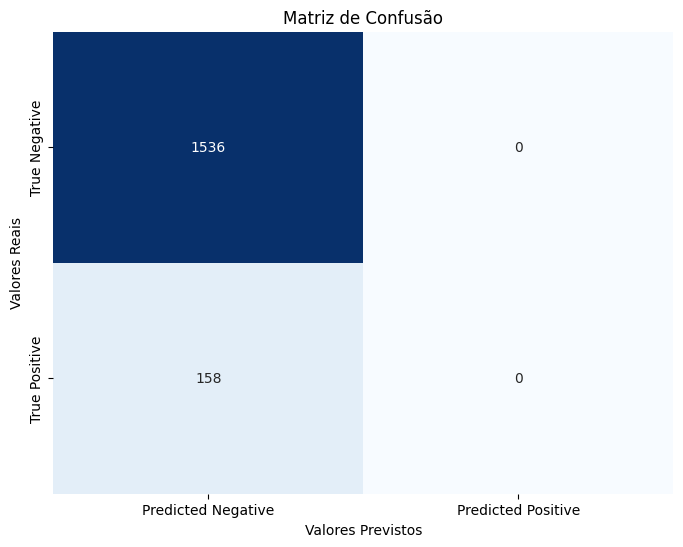

In [207]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, y_pred_test)

# Converter a matriz de confusão em um DataFrame para melhor visualização
cm_df = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Previstos')
plt.show()

In [208]:
# testando todo dataset

y_pred_test = model.predict(nX)
y_pred_test = (y_pred_test>0.5)
y_true_test = Y
print("Acurácia no dataset : {0}".format(accuracy_score(y_true_test, y_pred_test).round(2)))

# Nos bastidores..
print('\n')
print('Relatório de Classificação')
print('\n')
print(classification_report(Y, y_pred_test))

# Matriz de confusão
print('\n')
print('Matriz de Confusão ')

print( confusion_matrix(Y, y_pred_test))

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia no dataset : 0.9


Relatório de Classificação


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5086
           1       0.00      0.00      0.00       558

    accuracy                           0.90      5644
   macro avg       0.45      0.50      0.47      5644
weighted avg       0.81      0.90      0.85      5644



Matriz de Confusão 
[[5086    0]
 [ 558    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Conclusão